#19 Clusterring Using Income Spent

## Importing the basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Dataset from Local Directory

In [ ]:
# from google.colab import files
# uploaded = files.upload()

## Importing the dataset

In [2]:
dataset = pd.read_csv('dataset.csv')

### Summarize Dataset

In [3]:
print(dataset.shape)
print(dataset.describe())
print(dataset.head(5))

(303, 2)
           INCOME       SPEND
count  303.000000  303.000000
mean   245.273927  149.646865
std     48.499412   22.905161
min    126.000000   71.000000
25%    211.000000  133.500000
50%    240.000000  153.000000
75%    274.000000  166.000000
max    417.000000  202.000000
   INCOME  SPEND
0     233    150
1     250    187
2     204    172
3     236    178
4     354    163


### Segregate & Zipping Dataset

In [4]:
Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list(zip(Income, Spend)))
X

array([[233, 150],
       [250, 187],
       [204, 172],
       [236, 178],
       [354, 163],
       [192, 148],
       [294, 153],
       [263, 173],
       [199, 162],
       [168, 174],
       [239, 160],
       [275, 139],
       [266, 171],
       [211, 144],
       [283, 162],
       [219, 158],
       [340, 172],
       [226, 114],
       [247, 171],
       [239, 151],
       [234, 161],
       [233, 179],
       [226, 178],
       [243, 137],
       [199, 178],
       [302, 162],
       [212, 157],
       [175, 123],
       [417, 157],
       [197, 152],
       [198, 168],
       [177, 140],
       [219, 188],
       [273, 152],
       [213, 125],
       [177, 160],
       [304, 170],
       [232, 165],
       [269, 148],
       [360, 151],
       [308, 142],
       [245, 180],
       [208, 148],
       [264, 143],
       [321, 182],
       [325, 172],
       [235, 180],
       [257, 156],
       [216, 115],
       [234, 160],
       [256, 149],
       [302, 151],
       [231,

### Finding the Optimized K Value

/Users/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

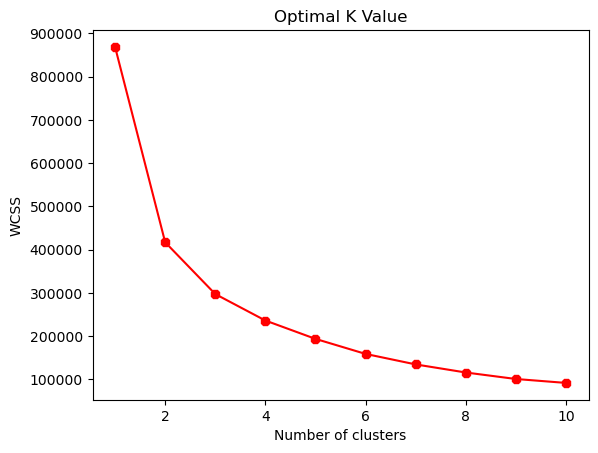

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss,color="red", marker ="8")
plt.title('Optimal K Value')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Fitting the k-means to the dataset with k=4

In [6]:
model=KMeans(n_clusters=4, random_state=0)
y_means = model.fit_predict(X)

/Users/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Visualizing the clusters for k=4

Cluster 1: Customers with medium income and low spend

Cluster 2: Customers with high income and medium to high spend

Cluster 3: Customers with low income

Cluster 4: Customers with medium income but high spend

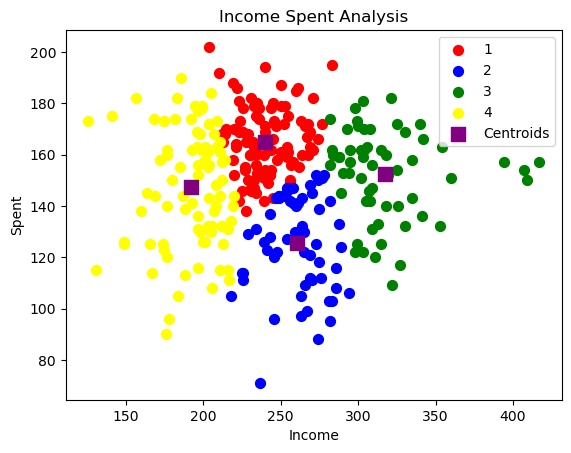

In [9]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='red',label='1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='yellow',label='4')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=100,marker='s', c='purple', label='Centroids')
plt.title('Income Spent Analysis')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend()
plt.show()